In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [70]:
dbase = pd.read_excel('engajamento-Instagram.xlsx')
dbase.drop("Visualizações", axis=1)
dbase.head()

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,82878.0,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,NaN,Produtos,S,N,NaN,4437


#### Verificação de tendencias na queda de curtidas
- Analise mensal

In [6]:
# Criando uma coluna mês
dbase["mes"]= dbase.Data.dt.year*100 + dbase.Data.dt.month
dbase.head()

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes,mes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874,202109
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958,202109
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816,202109
3,Vídeo,2021-09-12,5115,49,82878.0,Produtos,N,N,NaN,5164,202109
4,Foto,2021-09-13,4392,45,NaN,Produtos,S,N,NaN,4437,202109


In [7]:
media_mensal = dbase.groupby("mes")["Curtidas"].mean()
print(media_mensal)

mes
202109     6181.500000
202110    13390.400000
202111     4682.000000
202112    11863.833333
202201    15913.285714
202202    17081.363636
202203    13299.555556
Name: Curtidas, dtype: float64


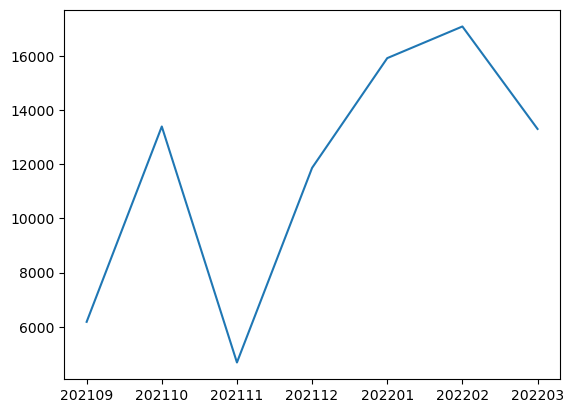

In [8]:
x = media_mensal.index.astype(str)
y = media_mensal.values
#plot
fig, ax = plt.subplots()
ax.plot(x,y)
plt.show()

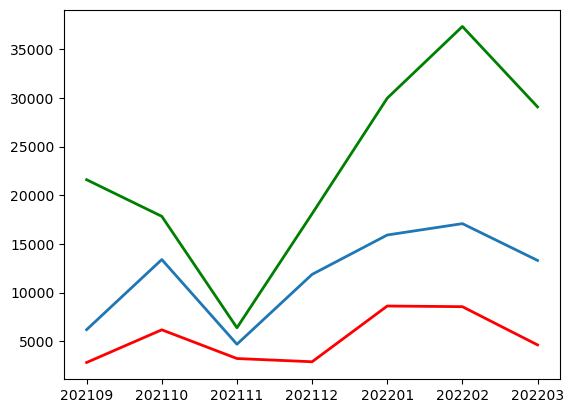

In [9]:
# Verificando e comparando medias mensais com os picos minimos e maximos
minimo = dbase.groupby("mes")["Curtidas"].min()
maximo = dbase.groupby("mes")["Curtidas"].max()

x = media_mensal.index.astype(str)
y = media_mensal.values
x1 = minimo.index.astype(str)
y1 = minimo.values
x2 = maximo.index.astype(str)
y2 = maximo.values

#plot

fig, ax = plt.subplots()
ax.plot (x,y, linewidth=2)
ax.plot(x1,y1, linewidth=2, color="r")
ax.plot(x2,y2, linewidth=2, color="g")
plt.show()


In [12]:
# Alguma publicação outlier no mês 02/2022 está saindo muito do padrão.
dbase[(dbase.Curtidas >=30000)].sort_values(["mes","Curtidas"], ascending=True)
# Trata-se de uma publicação que é uma Promoção, possui pessoas e é campanha

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes,mes
39,Foto,2022-02-17,37351,502,NaN,Promoções,S,S,NaN,37853,202202


In [14]:
# Filtrando todos os dados que tem a tag "Promoções"
dbase[dbase.fillna("").Tags.str.contains("Promoções")]

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes,mes
13,Foto,2021-10-24,15940,612,NaN,Promoções,S,N,NaN,16552,202110
39,Foto,2022-02-17,37351,502,NaN,Promoções,S,S,NaN,37853,202202
48,Foto,2022-03-20,29084,479,NaN,Datas comemorativas/Promoções,S,S,NaN,29563,202203


In [23]:
# Publicações que são do tipo promoção tem em média um engajamento maior, vale a pena observar se é valido fazer outras publicações do mesmo tipo a depender do custo-beneficio

In [71]:
# melhorando a visualização 
dbaseTags = dbase
dbaseTags.Tags = dbaseTags.Tags.str.split("/")
dbaseTags = dbaseTags.explode('Tags')
dbaseTags.head()

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja,N,N,NaN,2958
1,Foto,2021-09-11,2930,28,NaN,Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,82878.0,Produtos,N,N,NaN,5164


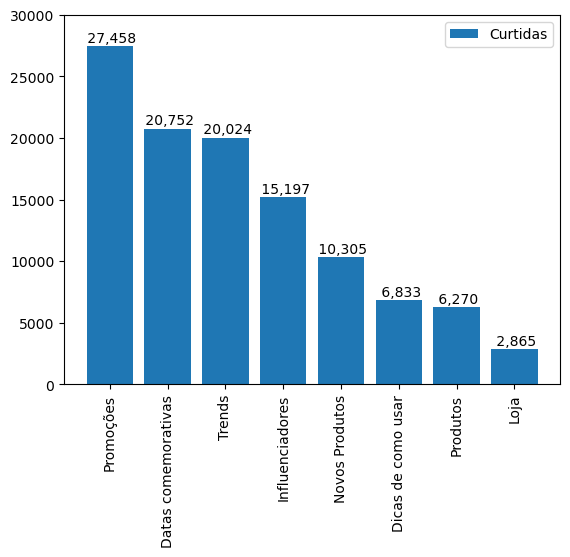

In [79]:
media = dbaseTags.groupby("Tags")["Curtidas"].mean().sort_values(ascending=False)
x = media.index
y = media.values

fig,ax = plt.subplots()
ax.bar(x,y, label="Curtidas")
ax.tick_params('x', labelrotation=90)
ax.legend()
for i in np.arange(0,8):
    plt.annotate('{: ,.0f}' .format(y[i]), #formatando numeros
                (i,y[i]), # posição do elemento
                ha="center",
                xytext=(0,3),
                textcoords="offset points"
    )
ax.set(ylim=(0,30000))

plt.show()